# testing models from CMIP6 historical runs
This script opens up CMIP6 historical model run files with data on precipitation pr and surface temperature tas and calculates monthly anomalies for each region.  Then tests the models for each region.  


In [1]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# import custom functions
import anomaly_function as func # imports the function
import model_figures as func2

In [3]:
# use this to reload the function file if I make any edits to it
func = reload(func) 
func2 = reload(func2)

In [4]:
!ls /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5

v20200302


In [5]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


## Read in model data

In [6]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

46 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [7]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [8]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [9]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.35 GB,228.10 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,333 Tasks,41 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.70 GB,456.19 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,382 Tasks,41 Chunks
Type,float64,numpy.ndarray


In [10]:
# sort models alphabetically and prints final model list
models = models.sortby('model')
print(models.model.data)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CESM2' 'CESM2-FV2'
 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM' 'CMCC-CM2-SR5' 'CanESM5'
 'E3SM-1-1' 'E3SM-1-1-ECA' 'EC-Earth3' 'EC-Earth3-Veg-LR' 'FGOALS-f3-L'
 'FGOALS-g3' 'FIO-ESM-2-0' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-G-CC' 'GISS-E2-1-H' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM6A-LR'
 'KACE-1-0-G' 'MIROC6' 'MPI-ESM-1-2-HAM' 'MPI-ESM1-2-LR' 'MRI-ESM2-0'
 'NESM3' 'NorCPM1' 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1']


In [11]:
# # get rid of new model
# models = models.drop_sel(model=['TaiESM1'])

## select out time around krakatoa eruption??

In [12]:
# models = models.sel(time = slice('1850-01','1900-01'))

In [13]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']
e_post10yrs = ['1893-08','1912-10', '1973-03', '1992-04', '2001-06']

## Select out regions
Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [14]:
# area weighting 
models_w = models*np.cos(models_tas.lat*(np.pi/180))

In [15]:
# select out the northern and sourhern hemisphere regions
models_SH = models_w.sel(lat=slice(-90,0))
models_NH = models_w.sel(lat=slice(0,90))


In [16]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [17]:
# this is where I use the land mask and select out the continents
models_w_land = models_w.where(landmask.data==1, drop=True)

In [18]:
# here I select the Australia region with a lon,lat box and the Eastern Australia region
models_aus = models_w_land.sel(lat=slice(-50,-10), lon=slice(110,160)) 
models_EAus = models_w_land.sel(lat=slice(-50,-10), lon=slice(140,155))

## Anomalies

In [19]:
# use functions to calculate the monthly and seasonal anomalies for the globe
# global
# monthly
monthly_anom_glob = func.monthly_anomaly(models_w, '1850-01', '1881-01')
# seasonal
seasonal_anom_glob = func.seasonal_anomaly(models_w, '1850-01', '1881-01')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [20]:
# use functions to calculate the monthly and seasonal anomalies for hemispheres
# NH
monthly_anom_NH = func.monthly_anomaly(models_NH, '1850-01', '1881-01')
seasonal_anom_NH = func.seasonal_anomaly(models_NH, '1850-01', '1881-01')
# SH
monthly_anom_SH = func.monthly_anomaly(models_SH, '1850-01', '1881-01')
seasonal_anom_SH = func.seasonal_anomaly(models_SH, '1850-01', '1881-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [21]:
# use functions to calculate the monthly and seasonal anomalies for aus and E aus
# Australia 
monthly_anom_Aus = func.monthly_anomaly(models_aus, '1850-01', '1881-01')
seasonal_anom_Aus = func.seasonal_anomaly(models_aus, '1850-01', '1881-01')

# East Australia
monthly_anom_EA = func.monthly_anomaly(models_EAus, '1850-01', '1881-01')
seasonal_anom_EA = func.seasonal_anomaly(models_EAus, '1850-01', '1881-01')


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 165 times more chunks
  return self.array[key]


In [22]:
# take the mean in longitude and latitude for each model
# monthly
mean_mon_Glob = monthly_anom_glob.mean(dim=('lat','lon'))
mean_mon_NH = monthly_anom_NH.mean(dim=('lat','lon'))
mean_mon_SH = monthly_anom_SH.mean(dim=('lat','lon'))
mean_mon_Aus = monthly_anom_Aus.mean(dim=('lat','lon'))
mean_mon_EA = monthly_anom_EA.mean(dim=('lat','lon'))

# Seasonal
mean_seasonal_Glob = seasonal_anom_glob.mean(dim=('lat','lon'))
mean_seasonal_NH = seasonal_anom_NH.mean(dim=('lat','lon'))
mean_seasonal_SH = seasonal_anom_SH.mean(dim=('lat','lon'))
mean_seasonal_Aus = seasonal_anom_Aus.mean(dim=('lat','lon'))
mean_seasonal_EA = seasonal_anom_EA.mean(dim=('lat','lon'))

In [23]:
# calculate the percentiles and then take the mean along the model dimension for monthly anomalies
# 10th percentile
p10_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.1, dim=['model']) # this one is right
p10_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_mon_Glob = mean_mon_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_NH = mean_mon_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_SH = mean_mon_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_Aus = mean_mon_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_mon_EA = mean_mon_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [24]:
# calculate the percentiles and then take the mean along the model dimension for seasonal anomalies
# 10th percentile
p10_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.1, dim=['model'])
p10_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.1, dim=['model'])

# 90th percentile
p90_seasonal_Glob = mean_seasonal_Glob.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_NH = mean_seasonal_NH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_SH = mean_seasonal_SH.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_Aus = mean_seasonal_Aus.chunk({'model': -1}).quantile(0.9, dim=['model'])
p90_seasonal_EA = mean_seasonal_EA.chunk({'model': -1}).quantile(0.9, dim=['model'])


In [25]:
# calculate the multi model mean 
# monthly
mmm_mon_Glob = mean_mon_Glob.mean(dim='model')
mmm_mon_NH = mean_mon_NH.mean(dim='model')
mmm_mon_SH = mean_mon_SH.mean(dim='model')
mmm_mon_Aus = mean_mon_Aus.mean(dim='model')
mmm_mon_EA = mean_mon_EA.mean(dim='model')

# seasonal
mmm_seasonal_Glob = mean_seasonal_Glob.mean(dim='model')
mmm_seasonal_NH = mean_seasonal_NH.mean(dim='model')
mmm_seasonal_SH = mean_seasonal_SH.mean(dim='model')
mmm_seasonal_Aus = mean_seasonal_Aus.mean(dim='model')
mmm_seasonal_EA = mean_seasonal_EA.mean(dim='model')

In [26]:
# calculate the standard deviation for each model over the time period from 1850-1880
std_Glob = mean_mon_Glob.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_SH = mean_mon_SH.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_Aus = mean_mon_Aus.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])
std_EA = mean_mon_EA.sel(time = slice('1850-01', '1881-01')).std(dim = ['time'])

In [27]:
# calculate the mean for each model over the time period from 1850-1880
time_mean_Glob = mean_mon_Glob.sel(time = slice('1850-01', '1881-01')).mean(dim = ['time'])
time_mean_SH = mean_mon_SH.sel(time = slice('1850-01', '1881-01')).mean(dim = ['time'])
time_mean_Aus = mean_mon_Aus.sel(time = slice('1850-01', '1881-01')).mean(dim = ['time'])
time_mean_EA = mean_mon_EA.sel(time = slice('1850-01', '1881-01')).mean(dim = ['time'])

In [28]:
print(std_Glob.pr.sel(model='ACCESS-CM2').values)
print(mean_mon_Glob.sel(time = slice('1850-01', '1881-01')).mean(dim='time').pr.sel(model='ACCESS-CM2').values)

0.016340202095109016
-1.1905876939679963e-18


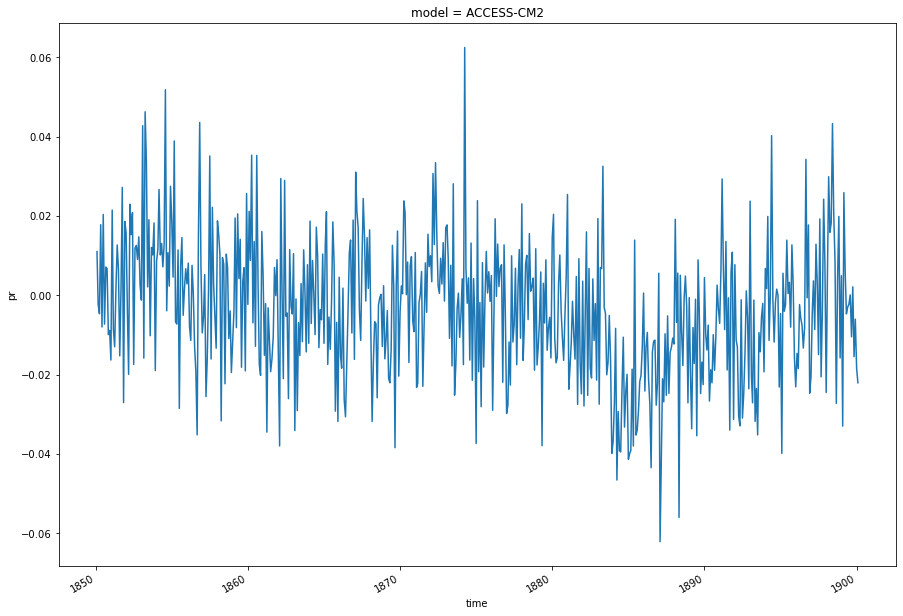

In [29]:
fig, axes = plt.subplots(1, figsize=(15,10))
mean_mon_Glob.pr.sel(model='ACCESS-CM2').sel(time = slice('1850-01','1900-01')).plot(ax=axes)

In [30]:
print(mean_mon_Glob.pr.sel(model='ACCESS-CM2').values)

[ 0.01100331 -0.00233234 -0.00467326 ...  0.02059579  0.00938255
  0.0261102 ]


In [31]:
# check if the anomalies are less than the standard deviation and if so, assign them a 1
model_std_check_Glob = xr.where(mean_mon_Glob < time_mean_Glob - std_Glob, 1,0)
model_std_check_SH = xr.where(mean_mon_SH < time_mean_SH - std_SH, 1,0)
model_std_check_Aus = xr.where(mean_mon_Aus < time_mean_Aus - std_Aus, 1,0)
model_std_check_EA = xr.where(mean_mon_EA < time_mean_EA - std_EA, 1,0)

In [32]:
# check if the anomalies are less than the 2 standard deviation and if so, assign them a 1
model_2std_check_Glob = xr.where(mean_mon_Glob < time_mean_Glob - 2*std_Glob, 1,0)
model_2std_check_SH = xr.where(mean_mon_SH < time_mean_SH - 2*std_SH, 1,0)
model_2std_check_Aus = xr.where(mean_mon_Aus < time_mean_Aus - 2*std_Aus, 1,0)
model_2std_check_EA = xr.where(mean_mon_EA < time_mean_EA - 2*std_EA, 1,0)

In [33]:
# check if the anomalies are less than the 3 standard deviation and if so, assign them a 1
model_3std_check_Glob = xr.where(mean_mon_Glob < time_mean_Glob - 3*std_Glob, 1,0)
model_3std_check_SH = xr.where(mean_mon_SH < time_mean_SH - 3*std_SH, 1,0)
model_3std_check_Aus = xr.where(mean_mon_Aus < time_mean_Aus - 3*std_Aus, 1,0)
model_3std_check_EA = xr.where(mean_mon_EA < time_mean_EA - 3*std_EA, 1,0)

In [47]:
e_post5yrs[0] 

'1888-08'

In [54]:
model_2std_check_Glob

,Array,Chunk
Bytes,649.44 kB,8 B
Shape,"(41, 1980)","(1, 1)"
Count,468267 Tasks,81180 Chunks
Type,int64,numpy.ndarray
,Array,Chunk
Bytes,649.44 kB,8 B
Shape,"(41, 1980)","(1, 1)"
Count,468316 Tasks,81180 Chunks
Type,int64,numpy.ndarray


In [113]:
mean_mon_Glob.sel(model='ACCESS-CM2').pr

,Array,Chunk
Bytes,15.84 kB,8 B
Shape,"(1980,)","(1,)"
Count,251438 Tasks,1980 Chunks
Type,float64,numpy.ndarray


In [114]:
# count how many times we get an anomaly below 2 standard deviations for a model
np.count_nonzero(mean_mon_Glob.sel(model='ACCESS-CM2').pr < time_mean_Glob.sel(model='ACCESS-CM2').pr - 2*std_Glob.sel(model='ACCESS-CM2').pr)

131

In [130]:
# performs account over each model (need to figure out how to add count values to models)
count = []
counts={}
for i, m in enumerate(model_2std_check_Glob.model):
    c = np.count_nonzero(model_2std_check_Glob.sel(model=m).pr == 1)
    print(c)
    print(m.data)
    #count['m']=c
    count.append(c)
    counts[f'{m.data}']=c
    
count


131
ACCESS-CM2
190
ACCESS-ESM1-5
87
AWI-CM-1-1-MR
91
AWI-ESM-1-1-LR
44
BCC-CSM2-MR
106
BCC-ESM1
37
CAMS-CSM1-0
412
CAS-ESM2-0
98
CESM2
127
CESM2-FV2
53
CESM2-WACCM
78
CESM2-WACCM-FV2
21
CIESM
67
CMCC-CM2-SR5
60
CanESM5
319
E3SM-1-1
266
E3SM-1-1-ECA
183
EC-Earth3
17
EC-Earth3-Veg-LR
45
FGOALS-f3-L
37
FGOALS-g3
99
FIO-ESM-2-0
185
GFDL-CM4
203
GFDL-ESM4
37
GISS-E2-1-G
56
GISS-E2-1-G-CC
36
GISS-E2-1-H
28
INM-CM4-8
25
INM-CM5-0
69
IPSL-CM6A-LR
30
KACE-1-0-G
97
MIROC6
278
MPI-ESM-1-2-HAM
95
MPI-ESM1-2-LR
176
MRI-ESM2-0
103
NESM3
206
NorCPM1
116
NorESM2-LM
131
NorESM2-MM
209
SAM0-UNICON
349
TaiESM1


[131,
 190,
 87,
 91,
 44,
 106,
 37,
 412,
 98,
 127,
 53,
 78,
 21,
 67,
 60,
 319,
 266,
 183,
 17,
 45,
 37,
 99,
 185,
 203,
 37,
 56,
 36,
 28,
 25,
 69,
 30,
 97,
 278,
 95,
 176,
 103,
 206,
 116,
 131,
 209,
 349]

In [131]:
counts

{'ACCESS-CM2': 131,
 'ACCESS-ESM1-5': 190,
 'AWI-CM-1-1-MR': 87,
 'AWI-ESM-1-1-LR': 91,
 'BCC-CSM2-MR': 44,
 'BCC-ESM1': 106,
 'CAMS-CSM1-0': 37,
 'CAS-ESM2-0': 412,
 'CESM2': 98,
 'CESM2-FV2': 127,
 'CESM2-WACCM': 53,
 'CESM2-WACCM-FV2': 78,
 'CIESM': 21,
 'CMCC-CM2-SR5': 67,
 'CanESM5': 60,
 'E3SM-1-1': 319,
 'E3SM-1-1-ECA': 266,
 'EC-Earth3': 183,
 'EC-Earth3-Veg-LR': 17,
 'FGOALS-f3-L': 45,
 'FGOALS-g3': 37,
 'FIO-ESM-2-0': 99,
 'GFDL-CM4': 185,
 'GFDL-ESM4': 203,
 'GISS-E2-1-G': 37,
 'GISS-E2-1-G-CC': 56,
 'GISS-E2-1-H': 36,
 'INM-CM4-8': 28,
 'INM-CM5-0': 25,
 'IPSL-CM6A-LR': 69,
 'KACE-1-0-G': 30,
 'MIROC6': 97,
 'MPI-ESM-1-2-HAM': 278,
 'MPI-ESM1-2-LR': 95,
 'MRI-ESM2-0': 176,
 'NESM3': 103,
 'NorCPM1': 206,
 'NorESM2-LM': 116,
 'NorESM2-MM': 131,
 'SAM0-UNICON': 209,
 'TaiESM1': 349}

In [119]:
multi_model = xr.concat(model_2std_check_Glob, dim='2std_count', coords = 'minimal')
multi_model.coords['2std_count'] = count

TypeError: can only concatenate xarray Dataset and DataArray objects, got <class 'str'>

In [75]:
# calculates the minimum value of tas and pr for each model and stores in an xarray
ymin = xr.DataArray.min(mean_mon_Glob.sel(model='ACCESS-CM2'), dim='time')
ymin

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    model    <U16 'ACCESS-CM2'
Data variables:
    tas      float64 dask.array<chunksize=(), meta=np.ndarray>
    pr       float64 dask.array<chunksize=(), meta=np.ndarray>

In [ ]:
# calculates the min anomaly for a certain model and stores as a numpy array 
ymin = np.min(mean_mon_Glob.sel(model='ACCESS-CM2').tas)
ymin.value

In [105]:
#find where the minimum value occurrs and store the location but it's not working 
x = np.where(mean_mon_Glob.sel(model='ACCESS-CM2').tas < ymin)
x
#from ruby
# ymax = np.max(zon_std.sel(model=m))
# xmax = lon[np.where(zon_std.sel(model=m) == ymax)]

(array([], dtype=int64),)

In [39]:
hello = mean_mon_Glob.pr < ymax.pr

In [40]:
print(hello.sel(model='ACCESS-CM2').values)

[False False False ... False False False]


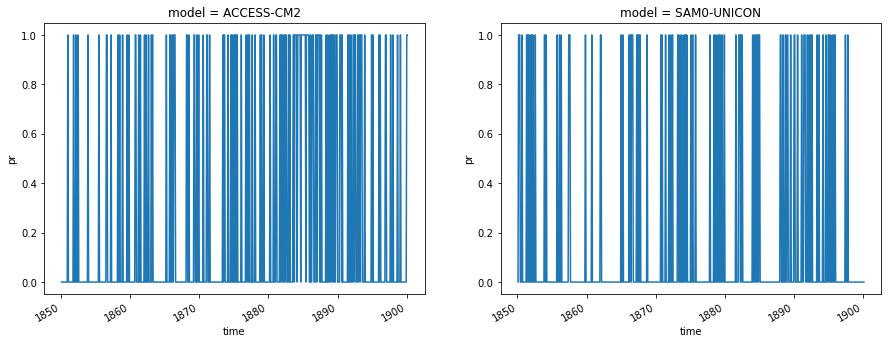

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
model_std_check_Glob.sel(model='ACCESS-CM2').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[0])
model_std_check_Glob.sel(model='SAM0-UNICON').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[1])

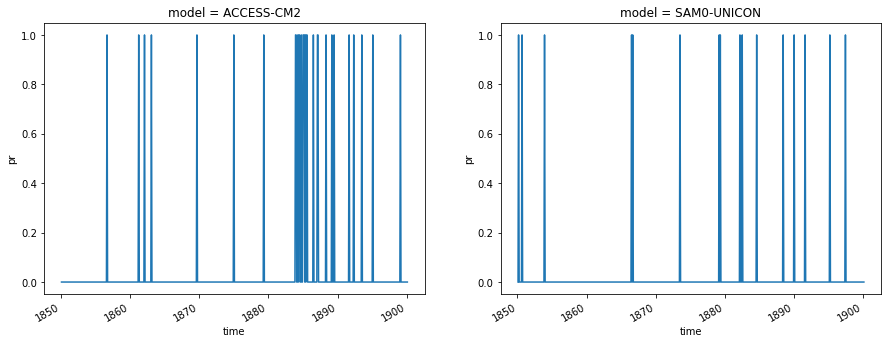

In [43]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
model_2std_check_Glob.sel(model='ACCESS-CM2').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[0])
model_2std_check_Glob.sel(model='SAM0-UNICON').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[1])

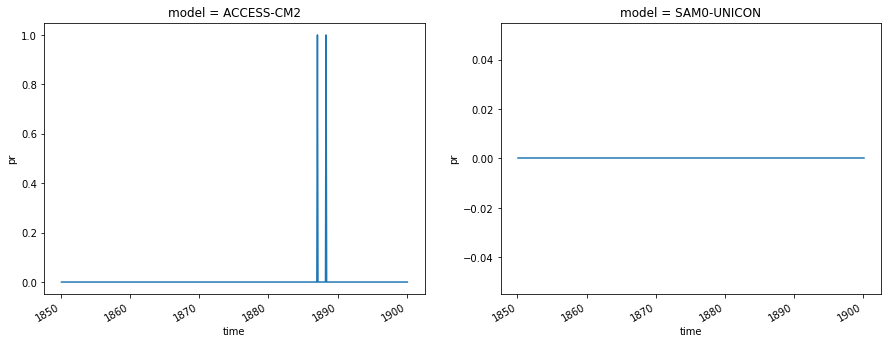

In [44]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
model_3std_check_Glob.sel(model='ACCESS-CM2').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[0])
model_3std_check_Glob.sel(model='SAM0-UNICON').pr.sel(time = slice('1850-01','1900-01')).plot(ax=axes[1])

## .where function
There are two kinds of .where().  dataset.where() is used for masking on a dataarray, while the top level xr.where(condition, option1, option2) chooses between 2 values.  

## Model test 
Check to see which models have a cooling signal 

In [ ]:
model_test =  mean_mon_Glob.where(mean_mon_Glob < std_Glob, 1,0)
model_test.pr

In [ ]:
pr_count =  np.sum(model_test.pr)
print(pr_count.values)

## Figures

In [ ]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']
e_post10yrs = ['1893-08','1912-10', '1973-03', '1992-04', '2001-06']